## This notebook demonstrates the use of PCA and T-SNE for dimensionality reduction

**The dataset used is the same MNIST dataset**

We first do the standard stuff as in the previous programs

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift, DBSCAN
import os


In [20]:
#traindata = pd.read_csv('train.csv')

traindata = pd.read_csv(r'C:\Users\subra\OneDrive\Desktop\add\train\train.csv')
traindata.head()
traindata.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

The data here has the labels in the first column, and the actual pixels of the digit in the other columns. We will now separate them.

In [21]:
labels = np.asarray(traindata.label) 
digits = np.asarray(traindata)
digits = digits[:,1:]


The labels array contains the labels of the data. The digits array contais the actual data, one digit per row. The digits are 28x28 pixels. Now we will trite a small function to visualize any digit we want.

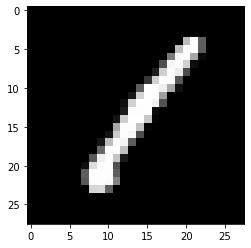

In [22]:
def getDigit(arr):
    pic = np.reshape(arr,[28,28])
    pic = np.uint8(pic)
    return pic

pic = getDigit(digits[0,:])
plt.imshow(pic,'gray')

... and a bunch of them.

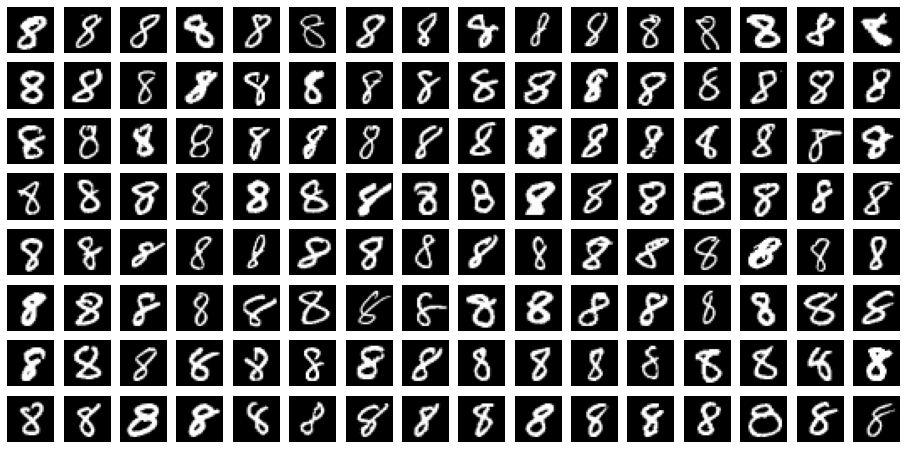

In [23]:
count = 0

fig=plt.figure(figsize=(16, 8))

columns = 16
rows = 8
digit_we_need_to_see = 8

for row in range(digits.shape[0]):
    if labels[row]==digit_we_need_to_see:
        count = count + 1
        pic = getDigit(digits[row,:])
        fig.add_subplot(rows, columns, count)
        plt.imshow(pic,'gray')
        plt.axis('off')
        
    if count == rows * columns:
        break
plt.show()


## Principal Component Analysis ##

Here we reduce the data to 10 dimensions and work with that reduced data to see how that works for us.

In [24]:
from sklearn.decomposition import PCA

(42000, 10)


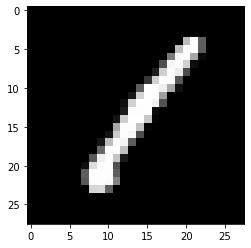

In [25]:
pca = PCA(n_components=10,whiten=True)
lowdigits = pca.fit_transform(digits)
print(lowdigits.shape)

# Reconstructed digits
digits2 = np.matmul(lowdigits,pca.components_)

#Have to normalize in the range [0,255] if I want to see them
d = digits[0] - min(digits[0])
d = d / max(d)
d = np.uint8(d*255)
plt.imshow(getDigit(d),'gray')

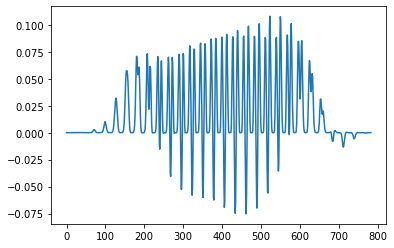

In [26]:
plt.plot(pca.components_[0])

In [27]:
model = KMeans(10)
model.fit(lowdigits, labels)



KMeans(n_clusters=10)

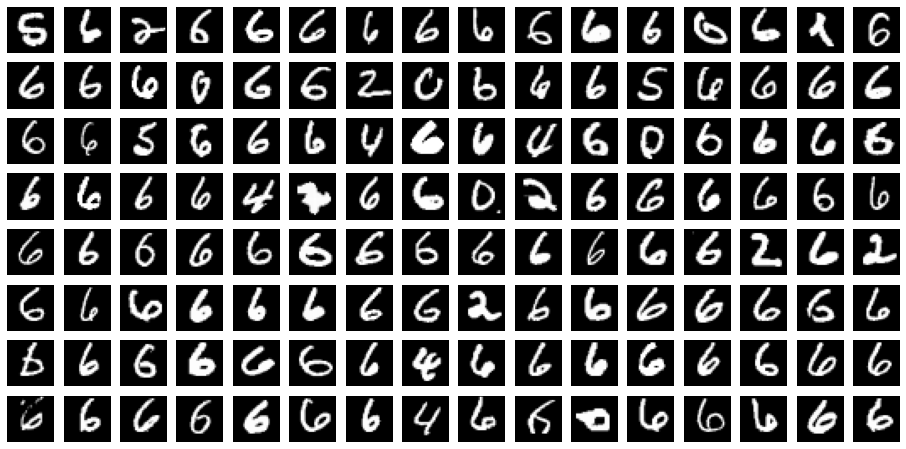

In [28]:
count = 0
fig=plt.figure(figsize=(16, 8))
columns = 16
rows = 8
cluster_we_need_to_see = 2

for row in range(digits.shape[0]):
    if model.labels_[row] == cluster_we_need_to_see:
        count = count + 1
        pic = getDigit(digits[row,:])
        fig.add_subplot(rows, columns, count)
        plt.imshow(pic,'gray')
        plt.axis('off')
        
    if count == rows * columns:
        break
plt.show()

## T-SNE ##

In [29]:
from sklearn.manifold import TSNE

In [30]:
digits_embedded = TSNE(n_components=2).fit_transform(lowdigits)
digits_embedded.shape

(42000, 2)

In [31]:
digits_embedded[0]

array([-37.511223,  50.99548 ], dtype=float32)

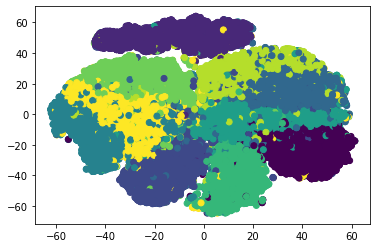

In [32]:
fig, ax = plt.subplots()
for color in ['rgbcmykrgb']:
    n = 42000
    x = digits_embedded[:n,0]
    y = digits_embedded[:n,1]
    ax.scatter(x, y,c=labels[:n])
